In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests

sourcepath_year=Path("Resources/winemag-data_year.csv")
wine_df=pd.read_csv(sourcepath_year)
wine_df.head()

,country,taster_name,title,description,designation,points,price,province,region_1,region_2,variety,winery,year
0,Italy,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,White Blend,Nicosia,2013.0
1,Portugal,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Portuguese Red,Quinta dos Avidagos,2011.0
2,US,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm,2013.0
3,US,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Riesling,St. Julian,2013.0
4,US,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks,2012.0


In [23]:
variety_group = wine_df.groupby(['variety'])
variety_gp = pd.DataFrame(variety_group.mean())
variety_gp["Count"] = variety_group.count()["country"]
variety_gp.sort_values(["points"], ascending=False).head()

,points,price,year,Count
variety,,,,
Terrantez,95.000000,236.0,1980.000000,1
Tinta del Pais,95.000000,47.5,2012.000000,2
Gelber Traminer,95.000000,35.0,2009.000000,1
Bual,94.142857,100.0,1995.571429,7
Sercial,94.000000,50.0,2002.000000,1


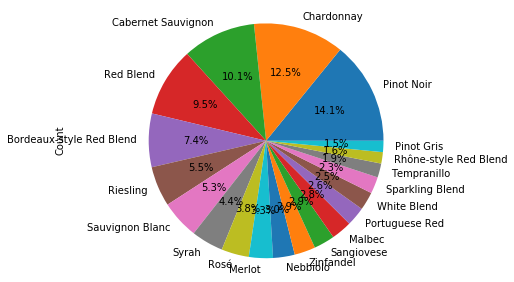

In [63]:
count = pd.DataFrame(variety_gp["Count"]).sort_values(["Count"], ascending=False).head(20)
variety_list = count.keys()
count_pie = count.plot(kind="pie", y=variety_list,autopct='%1.1f%%',legend=False)
plt.axis("equal")
plt.tight_layout()